In [1]:
import os
import sys
directory_path = os.path.abspath(os.path.join('..'))
if directory_path not in sys.path:
    sys.path.append(directory_path)
os.chdir(directory_path)
# Only for final delivery
import warnings
warnings.filterwarnings('ignore')
# libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="white")
# Libraries models
import pandas as pd
import numpy as np
from collections import Counter
from time import time
# Set some Pandas options
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline') 
get_ipython().magic(u"config InlineBackend.figure_format='retina'")
# Import the necessary module's
from scipy.stats import chi2
from sklearn.preprocessing import binarize
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import ComplementNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# library to save the models
import joblib
# import home made function
from utils import get_na, plot_pie,traine, test

In [2]:
path = os.getcwd() + '/data/interim/model_data_train_ohe.csv' 
X_train = pd.read_csv(path, sep=',')
path = os.getcwd() + '/data/interim/model_data_test_ohe.csv' 
X_test = pd.read_csv(path, sep=',')
path = os.getcwd() + '/data/interim/y_train_ohe.csv' 
y_train = pd.read_csv(path, sep=',')
path = os.getcwd() + '/data/interim/y_test_ohe.csv' 
y_test = pd.read_csv(path, sep=',')

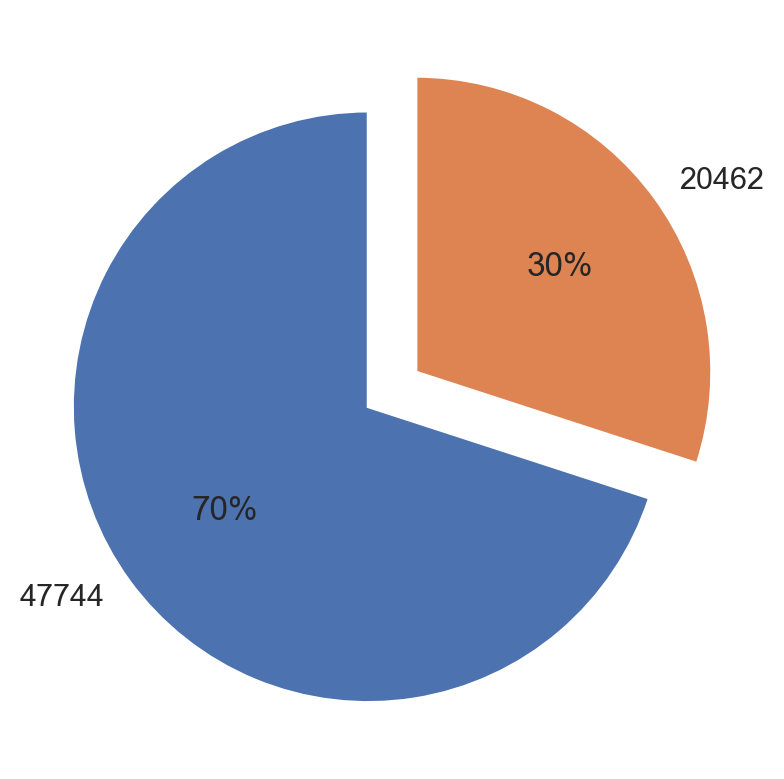

In [3]:
#define data
data = [X_train.shape[0],X_test.shape[0] ]
labels = [data[0], data[1]]
#create pie chart
plt.pie(data, labels = labels,startangle=90, 
        autopct='%1.f%%',explode=(0.1,0.1))
plt.show()

Información del dataset:
 las clases del target son: Counter({0: 38914, 1: 8830})


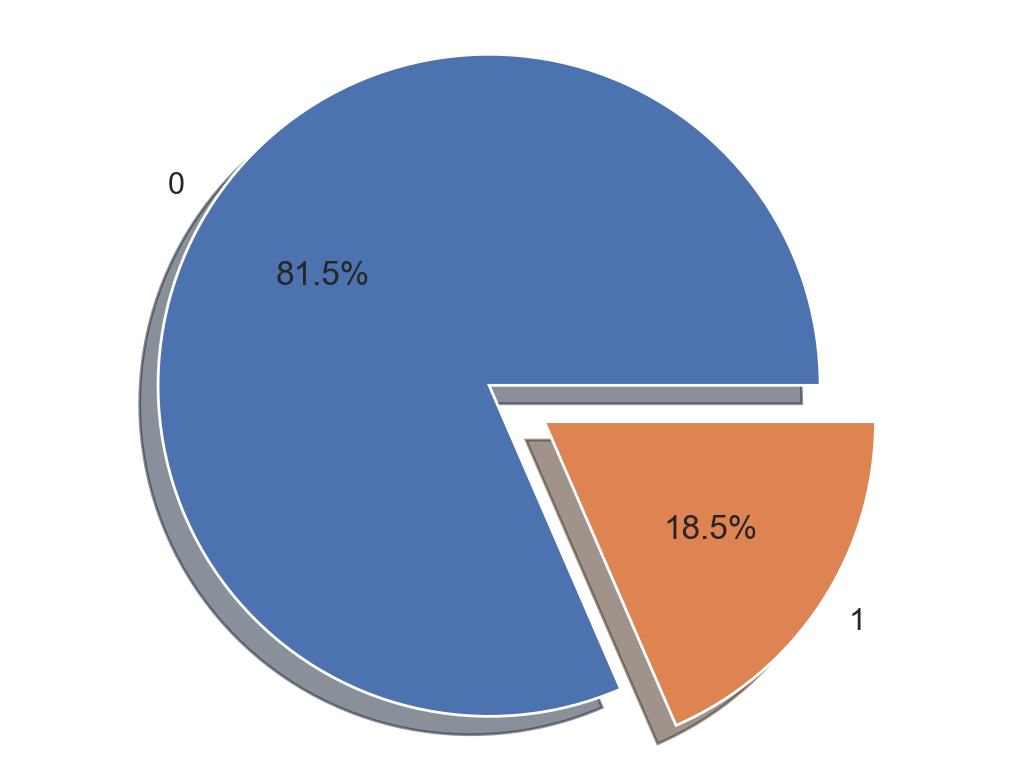

In [4]:
print('Información del dataset:'
      '\n las clases del target son: {}'.format(Counter(y_train.atraso_15)))
plot_pie(y_train.atraso_15)

In [5]:
clf = ComplementNB(alpha=0.1,class_prior = [0.815,0.185] )
y_pred_probs, y_pred = traine(clf, X_train, y_train,X_test,y_test)
test(y_test.atraso_15, y_pred_probs, y_pred)

El F1-weighted en entrenamiento con validación cruzada es es: 0.6717219343829118
EL ROC AUC Score es: 0.6694640218647092
              precision    recall  f1-score   support

           0       0.87      0.65      0.74     16678
           1       0.27      0.59      0.37      3784

    accuracy                           0.64     20462
   macro avg       0.57      0.62      0.56     20462
weighted avg       0.76      0.64      0.68     20462



Predicted class,False,True,All
Actual class,,,
0,10817,5861,16678
1,1562,2222,3784
All,12379,8083,20462


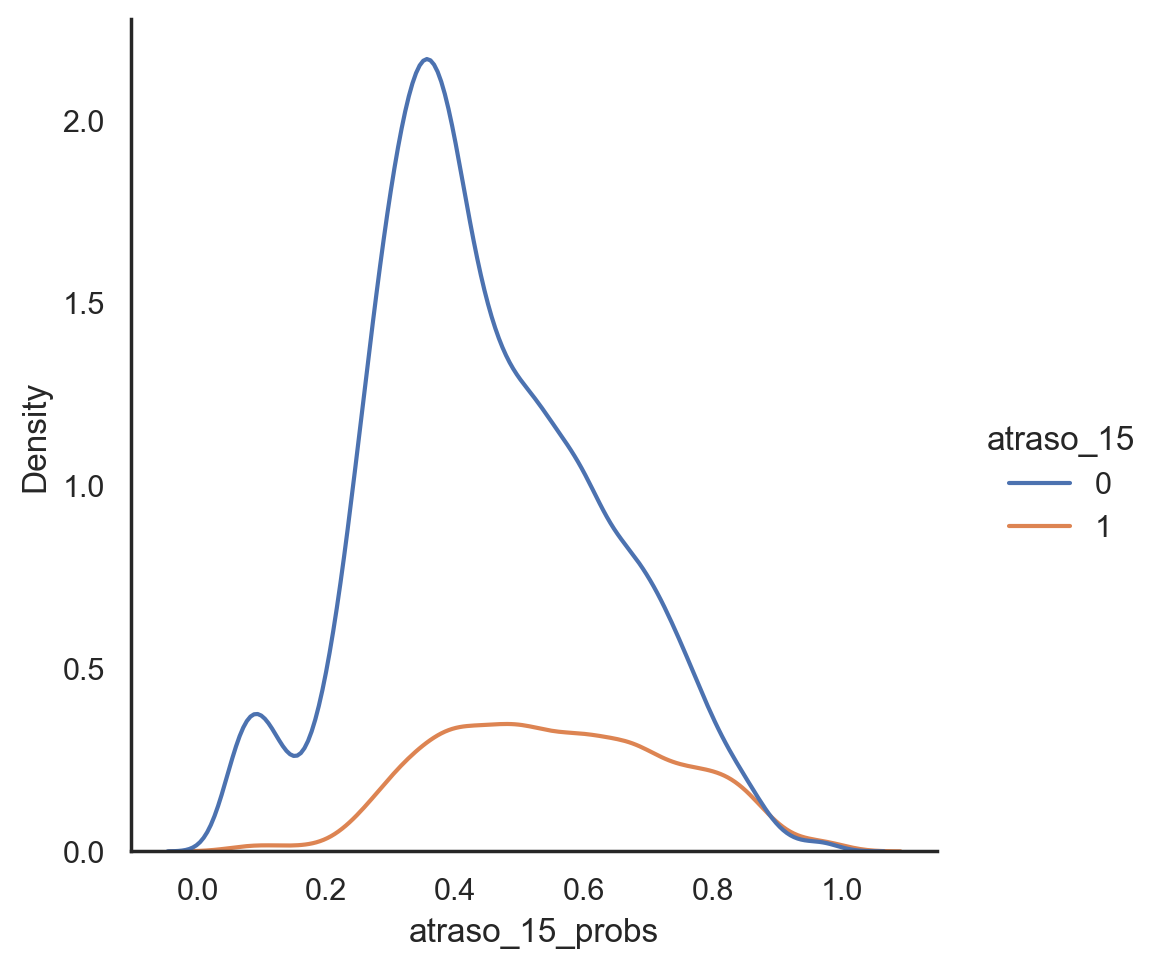

In [6]:
y_test['atraso_15_probs'] = y_pred_probs
sns.displot(data=y_test, x="atraso_15_probs", hue="atraso_15",kind="kde");

In [7]:
clf = DecisionTreeClassifier(random_state=0, max_features='sqrt',criterion='gini',
                             min_samples_split=0.001)
y_pred_probs, y_pred = traine(clf, X_train, y_train,X_test,y_test)
test(y_test.atraso_15, y_pred_probs, y_pred)

El F1-weighted en entrenamiento con validación cruzada es es: 0.7657206930187291
EL ROC AUC Score es: 0.6611057387952937
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     16678
           1       0.44      0.12      0.19      3784

    accuracy                           0.81     20462
   macro avg       0.63      0.54      0.54     20462
weighted avg       0.76      0.81      0.76     20462



Predicted class,False,True,All
Actual class,,,
0,16091,587,16678
1,3330,454,3784
All,19421,1041,20462


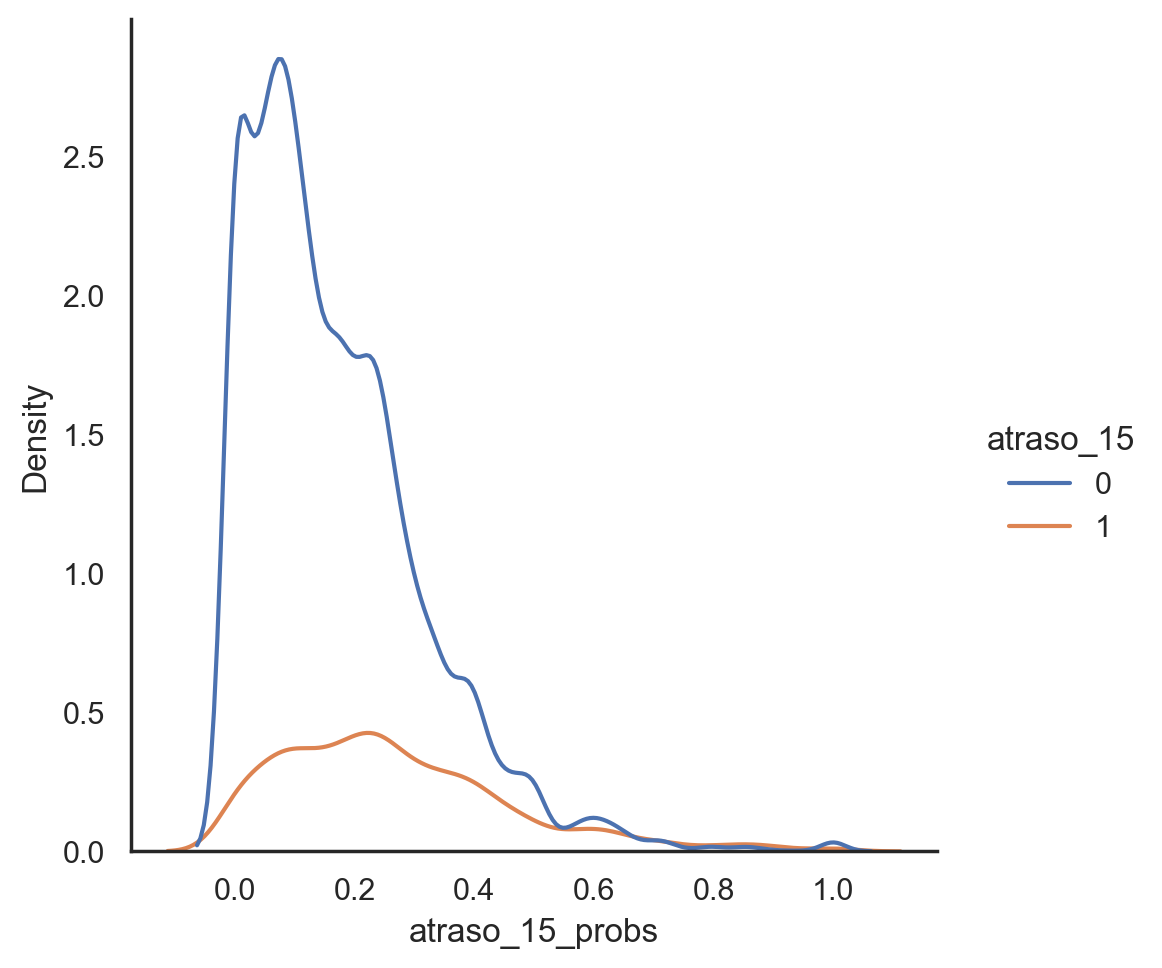

In [8]:
y_test['atraso_15_probs'] = y_pred_probs
sns.displot(data=y_test, x="atraso_15_probs", hue="atraso_15",kind="kde");

In [9]:
clf = LogisticRegression()
y_pred_probs, y_pred = traine(clf, X_train, y_train,X_test,y_test)
test(y_test.atraso_15, y_pred_probs, y_pred)

El F1-weighted en entrenamiento con validación cruzada es es: 0.7455043801005574
EL ROC AUC Score es: 0.6837078561419672
              precision    recall  f1-score   support

           0       0.82      0.99      0.90     16678
           1       0.53      0.04      0.07      3784

    accuracy                           0.82     20462
   macro avg       0.67      0.52      0.48     20462
weighted avg       0.77      0.82      0.74     20462



Predicted class,False,True,All
Actual class,,,
0,16550,128,16678
1,3641,143,3784
All,20191,271,20462


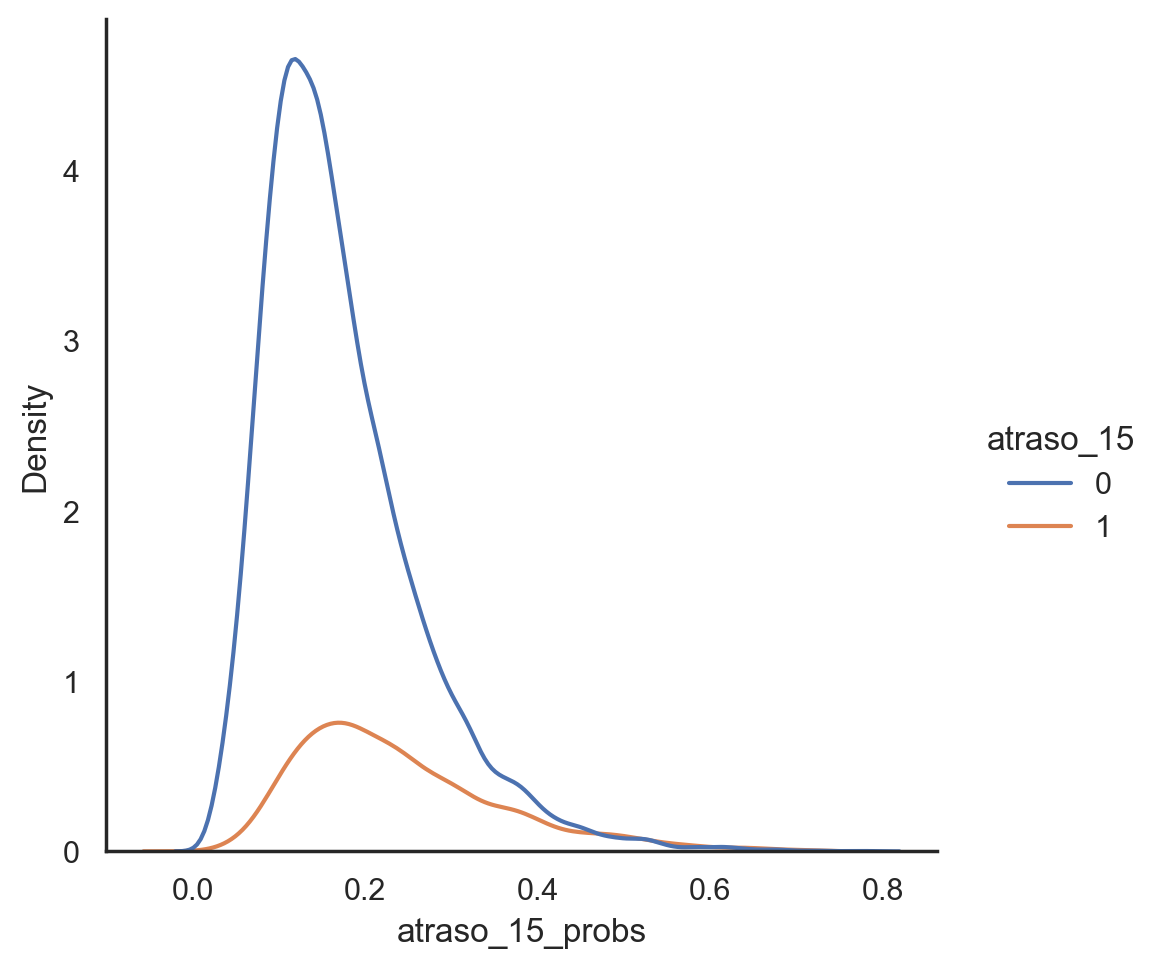

In [10]:
y_test['atraso_15_probs'] = y_pred_probs
sns.displot(data=y_test, x="atraso_15_probs", hue="atraso_15",kind="kde");

In [11]:
clf = RandomForestClassifier(n_estimators=500,random_state=0,warm_start=True,criterion='gini',
                             bootstrap=True,max_features='sqrt')
y_pred_probs, y_pred = traine(clf, X_train, y_train,X_test,y_test)
test(y_test.atraso_15, y_pred_probs, y_pred)

El F1-weighted en entrenamiento con validación cruzada es es: 0.7670295280768819
EL ROC AUC Score es: 0.6772929318211607
              precision    recall  f1-score   support

           0       0.84      0.91      0.87     16678
           1       0.38      0.24      0.29      3784

    accuracy                           0.79     20462
   macro avg       0.61      0.57      0.58     20462
weighted avg       0.75      0.79      0.77     20462



Predicted class,False,True,All
Actual class,,,
0,15180,1498,16678
1,2884,900,3784
All,18064,2398,20462


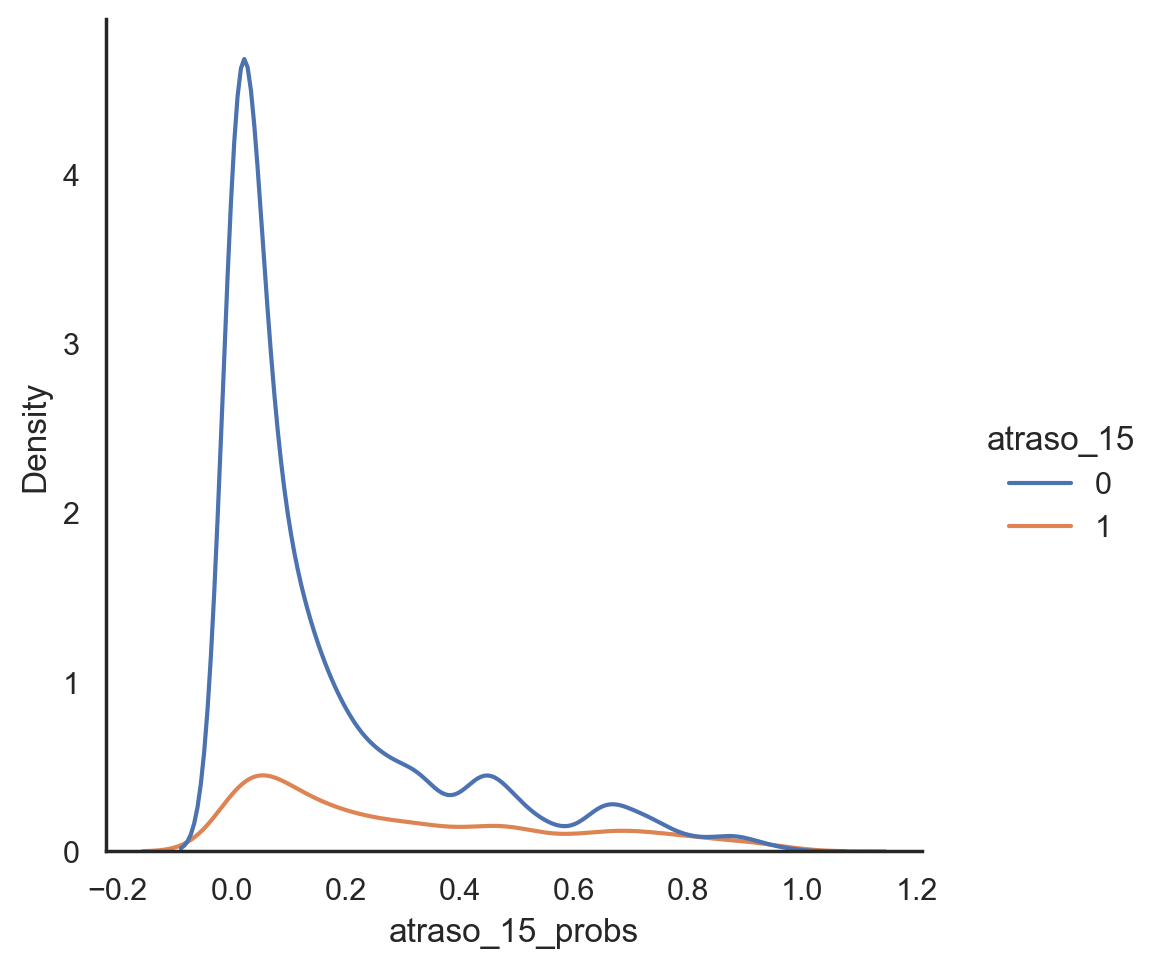

In [12]:
y_test['atraso_15_probs'] = y_pred_probs
sns.displot(data=y_test, x="atraso_15_probs", hue="atraso_15",kind="kde");

In [13]:
clf = XGBClassifier(random_state=0,verbosity = 0)
y_pred_probs, y_pred = traine(clf, X_train, y_train,X_test,y_test)
test(y_test.atraso_15, y_pred_probs, y_pred)

El F1-weighted en entrenamiento con validación cruzada es es: 0.7741555862704799
EL ROC AUC Score es: 0.7308219443547943
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     16678
           1       0.60      0.14      0.23      3784

    accuracy                           0.82     20462
   macro avg       0.72      0.56      0.57     20462
weighted avg       0.79      0.82      0.78     20462



Predicted class,False,True,All
Actual class,,,
0,16318,360,16678
1,3243,541,3784
All,19561,901,20462


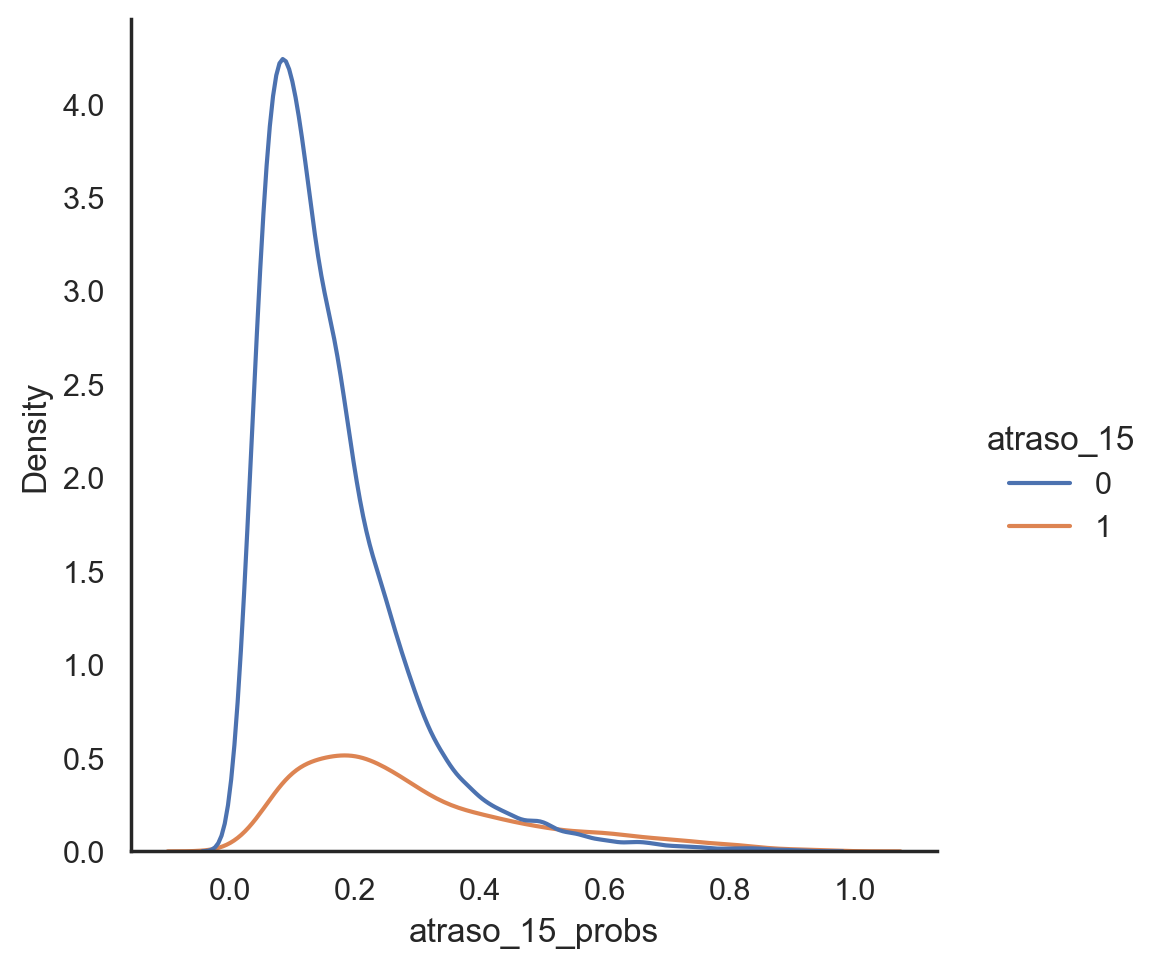

In [14]:
y_test['atraso_15_probs'] = y_pred_probs
sns.displot(data=y_test, x="atraso_15_probs", hue="atraso_15",kind="kde");

In [17]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
y_pred_probs, y_pred = traine(clf, X_train, y_train,X_test,y_test)
test(y_test.atraso_15, y_pred_probs, y_pred)

EL ROC AUC Score es: 0.6704098850202581
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16678
           1       0.00      0.00      0.00      3784

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462



Predicted class,False,True,All
Actual class,,,
0,16676,2,16678
1,3784,0,3784
All,20460,2,20462


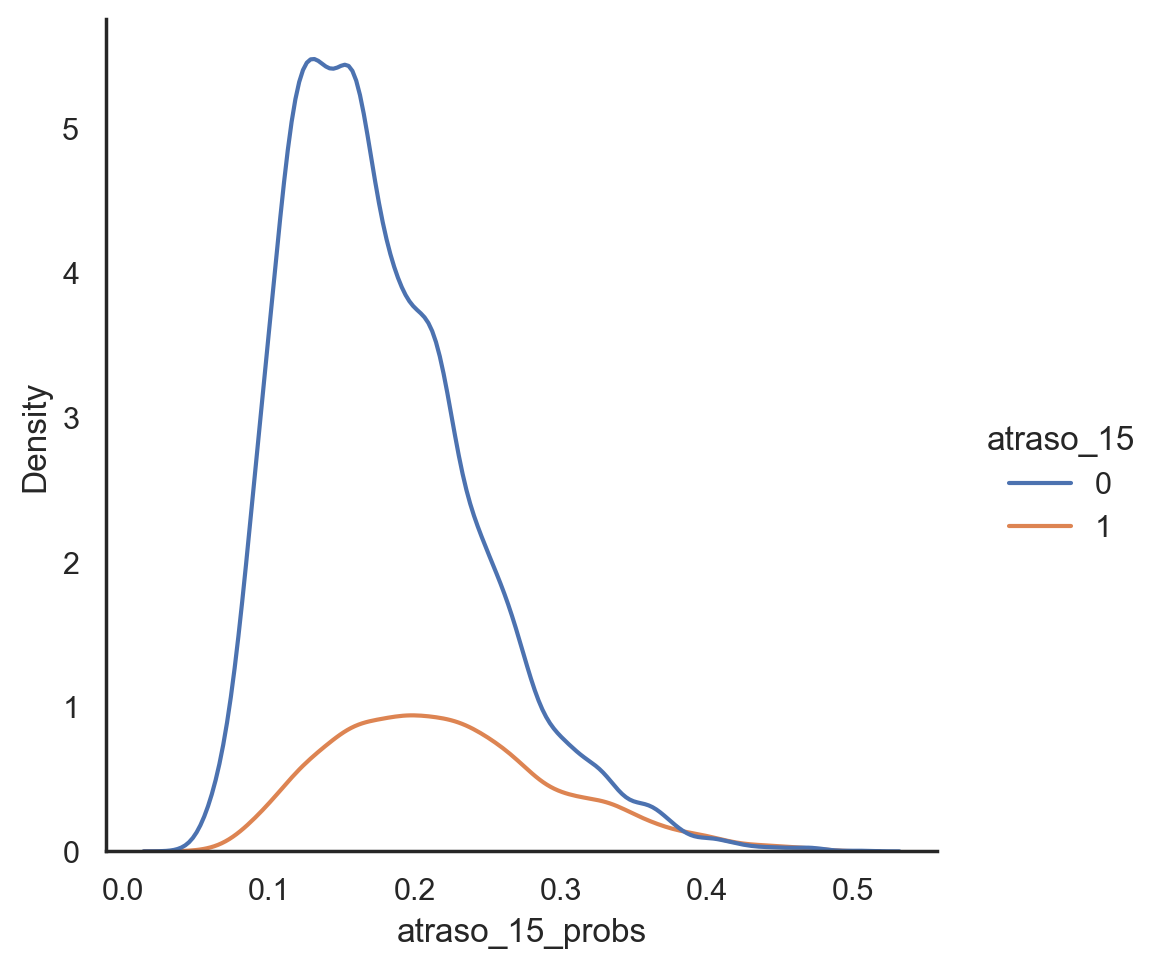

In [18]:
y_test['atraso_15_probs'] = y_pred_probs
sns.displot(data=y_test, x="atraso_15_probs", hue="atraso_15",kind="kde");